In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

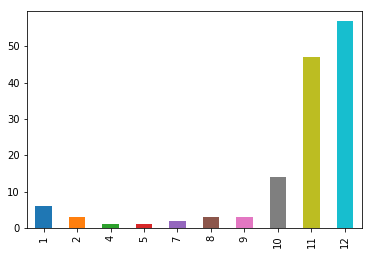

In [44]:
release_dates_christ=release_dates[release_dates.title.str.contains('Christmas')]
release_dates_christ_USA=release_dates_christ[release_dates_christ.country=='USA']
release_dates_christ_USA.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

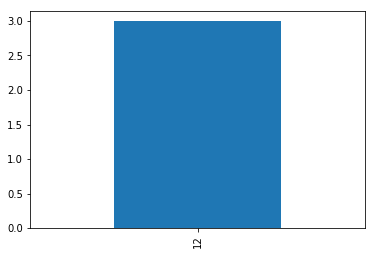

In [45]:
release_dates_christ=release_dates[release_dates.title.str.startswith('The Hobbit')]
release_dates_christ_USA=release_dates_christ[release_dates_christ.country=='USA']
release_dates_christ_USA.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

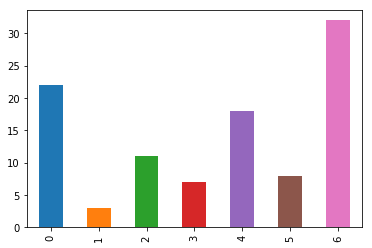

In [55]:
release_dates_christ=release_dates[release_dates.title.str.contains('Romance')]
release_dates_christ_USA=release_dates_christ[release_dates_christ.country=='USA']
release_dates_christ_USA.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

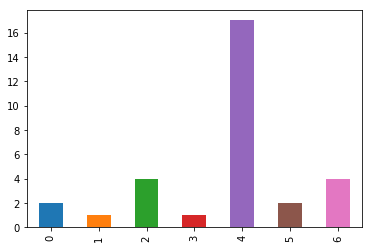

In [56]:
release_dates_christ=release_dates[release_dates.title.str.contains('Action')]
release_dates_christ_USA=release_dates_christ[release_dates_christ.country=='USA']
release_dates_christ_USA.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [64]:
c=cast[cast.name=='Judi Dench']
c=c.merge(release_dates)
c=c[c.country=='USA']
c=c[c.year//10*10==1990]
c.date.sort_values()

232    1995-11-17
431    1996-03-22
271    1996-12-25
548    1997-10-03
1515   1997-12-19
1013   1999-01-08
1213   1999-05-14
1442   1999-11-19
Name: date, dtype: datetime64[ns]

### In which months do films with Judi Dench tend to be released in the USA?

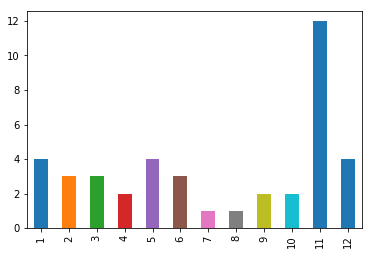

In [70]:
c=cast[cast.name=='Judi Dench']
c=c.merge(release_dates)
c=c[c.country=='USA']
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

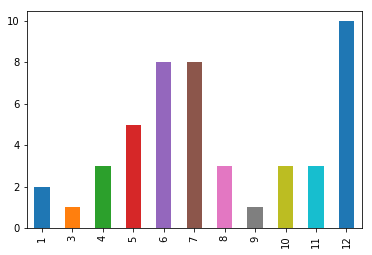

In [72]:
c=cast[cast.name=='Tom Cruise']
c=c.merge(release_dates)
c=c[c.country=='USA']
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

## Find Cary Grant's co stars in which Cary Grant played a leading role

                   title  year      name_x type_x      character_x  n_x  \
0  An Affair to Remember  1957  Cary Grant  actor  Nickie Ferrante  1.0   
1  An Affair to Remember  1957  Cary Grant  actor  Nickie Ferrante  1.0   
2  An Affair to Remember  1957  Cary Grant  actor  Nickie Ferrante  1.0   
3  An Affair to Remember  1957  Cary Grant  actor  Nickie Ferrante  1.0   
4  An Affair to Remember  1957  Cary Grant  actor  Nickie Ferrante  1.0   

              name_y type_y                  character_y  n_y  
0  Richard (V) Allen  actor                       Orphan  NaN  
1            Al Bain  actor  Undetermined Secondary Role  NaN  
2          Alex Ball  actor              Audience Member  NaN  
3     Dino Bolognese  actor       Italian TV Commentator  NaN  
4  Fortunio Bonanova  actor                      Courbet  8.0  


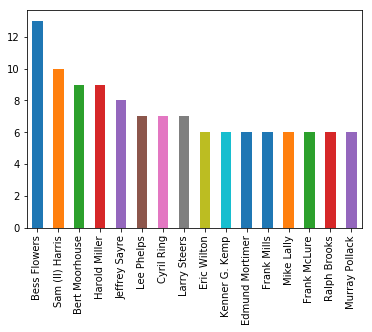

In [102]:
c=cast[cast.name==('Cary Grant')]
c=c[c.n<=2]
c=c.merge(cast,on=['title','year'])
print (c.head())
c_good=c[c.name_y!='Cary Grant']
c_good_counts=c_good.name_y.value_counts()
c_good_counts[c_good_counts>5].plot(kind='bar')

            title  year      name_x type_x        character_x  n_x  \
0  A Few Good Men  1992  Tom Cruise  actor  Lt. Daniel Kaffee  1.0   
1  A Few Good Men  1992  Tom Cruise  actor  Lt. Daniel Kaffee  1.0   
2  A Few Good Men  1992  Tom Cruise  actor  Lt. Daniel Kaffee  1.0   
3  A Few Good Men  1992  Tom Cruise  actor  Lt. Daniel Kaffee  1.0   
4  A Few Good Men  1992  Tom Cruise  actor  Lt. Daniel Kaffee  1.0   

             name_y type_y                  character_y   n_y  
0       Kevin Bacon  actor              Capt. Jack Ross   4.0  
1   Xander Berkeley  actor               Capt. Whitaker  13.0  
2  Wolfgang Bodison  actor  Lance Cpl. Harold W. Dawson  12.0  
3        David Bowe  actor                   Cdr. Gibbs  32.0  
4      Harry Caesar  actor                       Luther  27.0  


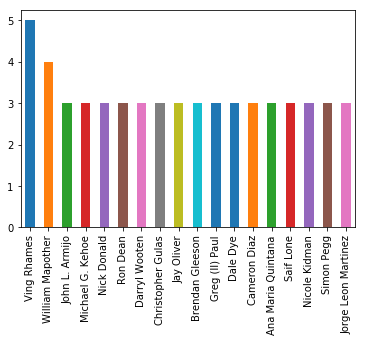

In [107]:
c=cast[cast.name==('Tom Cruise')]
c=c[c.n<=2]
c=c.merge(cast,on=['title','year'])
print (c.head())
c_good=c[c.name_y!='Tom Cruise']
c_good_counts=c_good.name_y.value_counts()
c_good_counts[c_good_counts>2].plot(kind='bar')

       title  year        name_x type_x character_x  n_x  \
0  Deception  2008  Hugh Jackman  actor  Wyatt Bose  2.0   
1  Deception  2008  Hugh Jackman  actor  Wyatt Bose  2.0   
2  Deception  2008  Hugh Jackman  actor  Wyatt Bose  2.0   
3  Deception  2008  Hugh Jackman  actor  Wyatt Bose  2.0   
4  Deception  2008  Hugh Jackman  actor  Wyatt Bose  2.0   

                         name_y type_y                  character_y   n_y  
0                  Bruce Altman  actor                    Lawyer #1   4.0  
1             David (IV) Boston  actor  Man Passing on the Sidewalk   NaN  
2                Danny Burstein  actor             Clute Controller  41.0  
3                     Bill Camp  actor           Clancey Controller  15.0  
4  Robert 'Toshi' Kar Yuen Chan  actor                      Hustler   NaN  


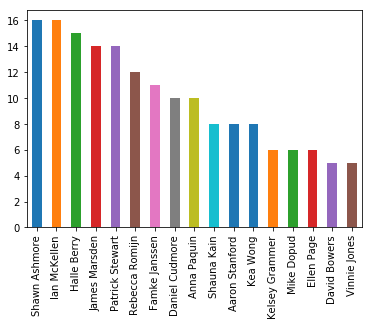

In [110]:
actor_q='Hugh Jackman'
c=cast[cast.name==(actor_q)]
c=c[c.n<=2]
c=c.merge(cast,on=['title','year'])
print (c.head())
c_good=c[c.name_y!=actor_q]
c_good_counts=c_good.name_y.value_counts()
c_good_counts[c_good_counts>4].plot(kind='bar')

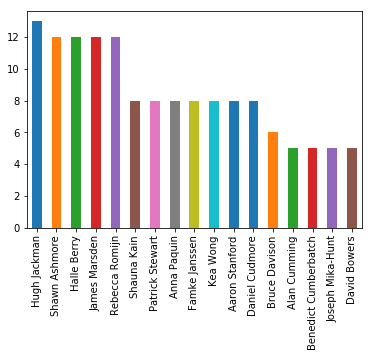

In [133]:
actor_q='Ian McKellen'
c=cast[cast.name==(actor_q)]
c=c[c.n<=5]
c=c.merge(cast,on=['title','year'])
(c.head())
c_good=c[c.name_y!=actor_q]
c_good_counts=c_good.name_y.value_counts()
c_good_counts[c_good_counts>4].plot(kind='bar')

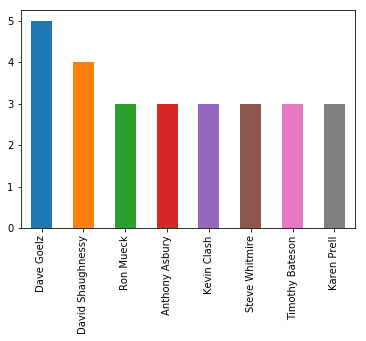

In [135]:
actor_q='David Bowie'
c=cast[cast.name==(actor_q)]
c=c[c.n<=5]
c=c.merge(cast,on=['title','year'])
(c.head())
c_good=c[c.name_y!=actor_q]
c_good_counts=c_good.name_y.value_counts()
c_good_counts[c_good_counts>2].plot(kind='bar')